# Assignment 1

> * **Daniel Holmelund - s194245**
> * **Christian Djurhuus - s194244** 
> * **Felix Burmester - s194266**

#### **Link to github:** https://github.com/Laitallis/Computational-Social-Science-02467

#### **Contributions:** 
*All members of the group participated equally throughout the exercise sessions and in preparation of this assignment.*

In [160]:
# Imports
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib as mpl
import matplotlib.dates as mdates
import netwulf

# Part 1: Datasets for Computational Social Science

Firstly the ten characteristics of big data are considered in relation to the dataset in question. For the first characteristic the data is loaded in.

In [3]:
GME_submissions = pd.read_csv("../comsocsci2022/lectures/data/wallstreet_subs.csv") #for Felix
GME_comments = pd.read_csv("../comsocsci2022/lectures/data/GME_comments_pd.csv") #for Felix
print(f"Size of submission dataset: {GME_submissions.shape[0]}")
print(f"Size of comments dataset: {GME_comments.shape[0]}")

Size of submission dataset: 14715
Size of comments dataset: 651256


* **Big:** As seen from the size of the submission and comments such a large number of data entries would not be realistic in the real world due to both financial and temporal constriants.
* **Always-on:** Since the data was collected from a open forum it allows us to continuously collect the newest data over time.
* **Non-reactive:** Since is directly from the posts and the interactions within the Wallstreetbets subreddit the dataset have a high level of non-reactivity. However the opinions and behaveior that emerges from the subcultures in r/wallstreetbets doesn't nessaryily reflect peoples real world beleifs and actions.
* **Incomplete:** The dataset certainly captures a lot of the trends and tendencies that help shape the movement behind the GME stock rise. However the situation behind this rise had a lot of actors which opinon and actions didn't necessarily reached the r/Wallstreetbets.
* **Non-representative:** It is certainly an example of the FOMO mentality that have driving alot of economic trends that have been observed lately. E.g. the abundance of different cryptovalutas. r/wallstreetbets also have a highly meme driven subculture, a phenomena that also is observed in the cryptovaluta community, e.g. Dogecoin.
* **Drifting:** As the GME gets more traction there happens a population drift. The userbase gets a lot more diverse since the idea of making a quick buck or mess with the big hedge funds attracts a lot of different people. This population drift also leads to somewhat of a behaveioral drift.
* **Algorithmically confounded:** This is a differcult question since it is hard to know exactly how Reddit have built their platform and how/if they promote content. However there could potentially be some level of performativity.
* **Dirty:** Since the subreddit by nature have a lot of user that are driven by profit, the dataset have alot of potentital ways it could be dirty. A main contender would be spamming. However as mentioned in "Bit by Bit" what exactly constitutes a dirty dataset is highly reliant of the research question.
* **Sensitive:** There are a lot of personal stories on the subreddit as well as people's portfolios. This is information that we collect and analyze without the user knownledge or consent which of course raises some etical concerns. 

# Part 2: activity on Reddit and GME prices



In [5]:
# Firstly the UTC dates are converted
GME_comments['date'] = GME_comments['created_utc'].apply(lambda x: dt.datetime.utcfromtimestamp(x)).dt.date
GME_comments['date'] = pd.to_datetime(GME_comments['date'])
GME_comments = GME_comments.set_index("date")

In [6]:
# Also lets let customize some of the parameters of the matplotlib library.
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

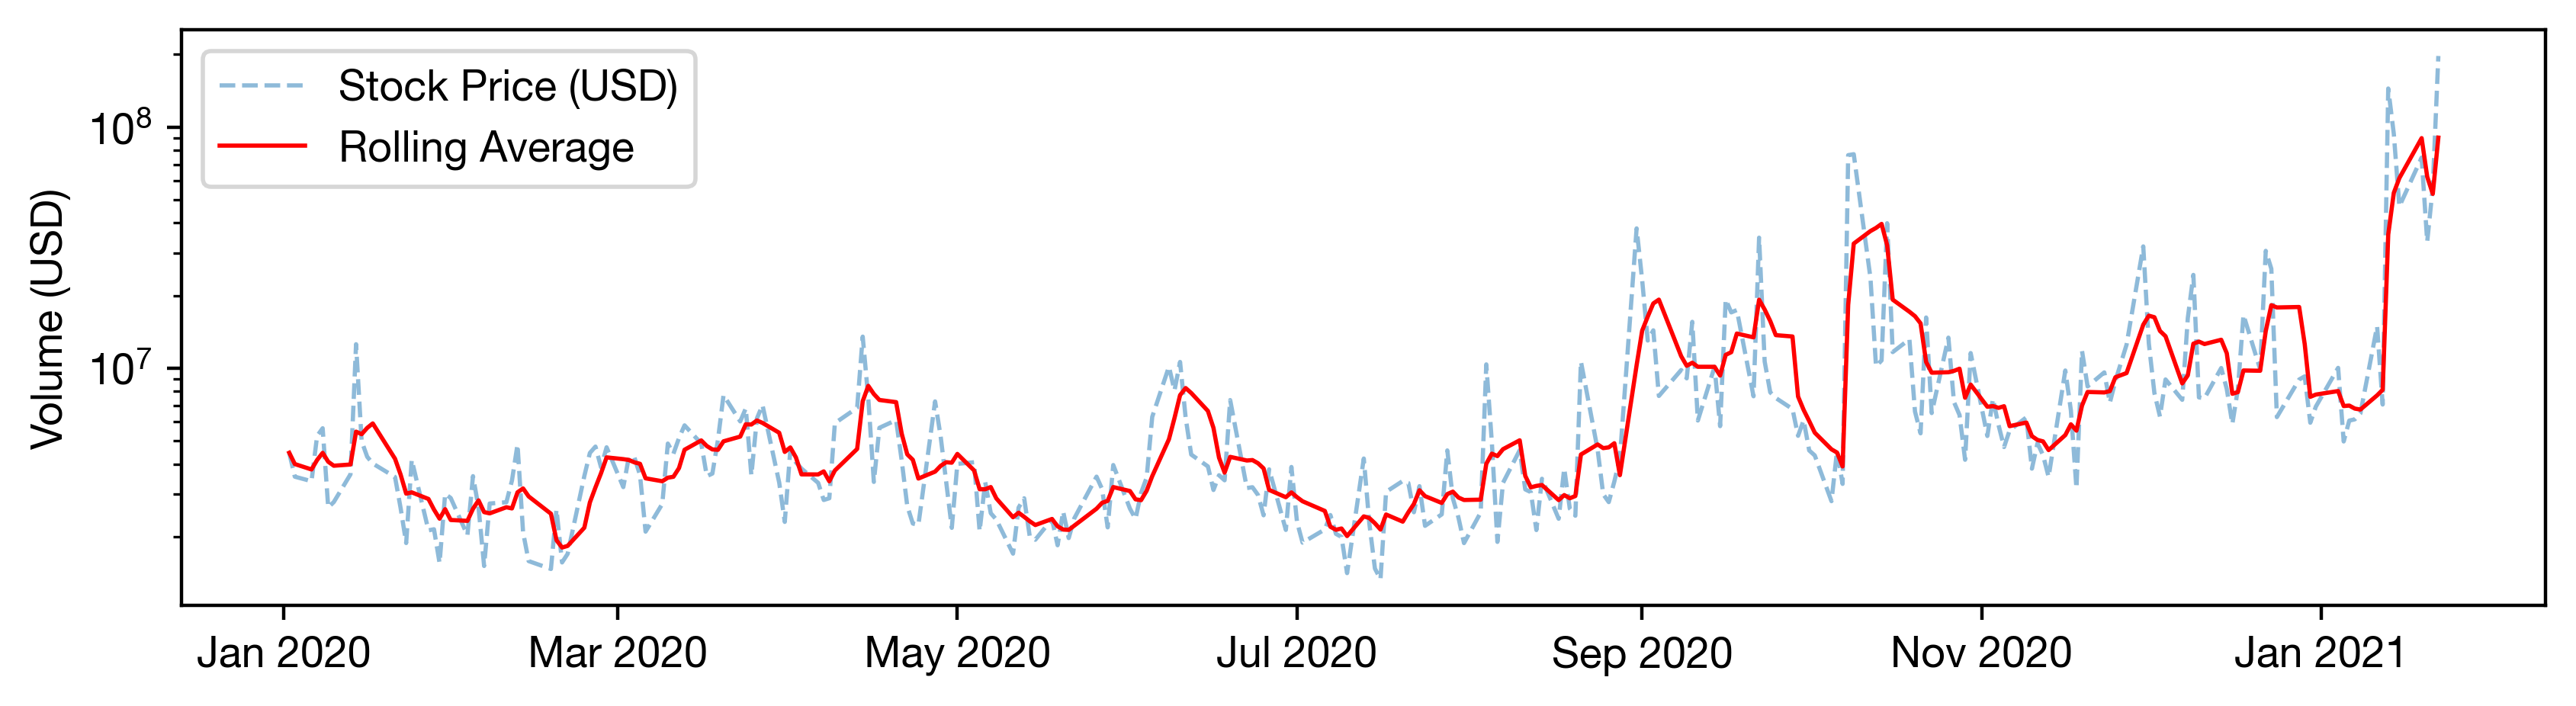

In [36]:
# Plot of the daily volume of the GME stock
GME_data = pd.read_csv("GME.csv", parse_dates = ["Date"]).set_index("Date") #for Felix
rolled_series = GME_data["Volume"].rolling("7D").mean()
myFmt = mdates.DateFormatter("%b %Y")
fig, ax = plt.subplots(figsize=(10,2.5), dpi = 400)
ax.plot(GME_data.index, GME_data.Volume, ls = "--", alpha = 0.5, label='Stock Price (USD)')
ax.plot(rolled_series.index, rolled_series.values, color = "r", label='Rolling Average')
ax.set_ylabel("Volume (USD)")
ax.set_yscale("log")
ax.legend()
ax.xaxis.set_major_formatter(myFmt)

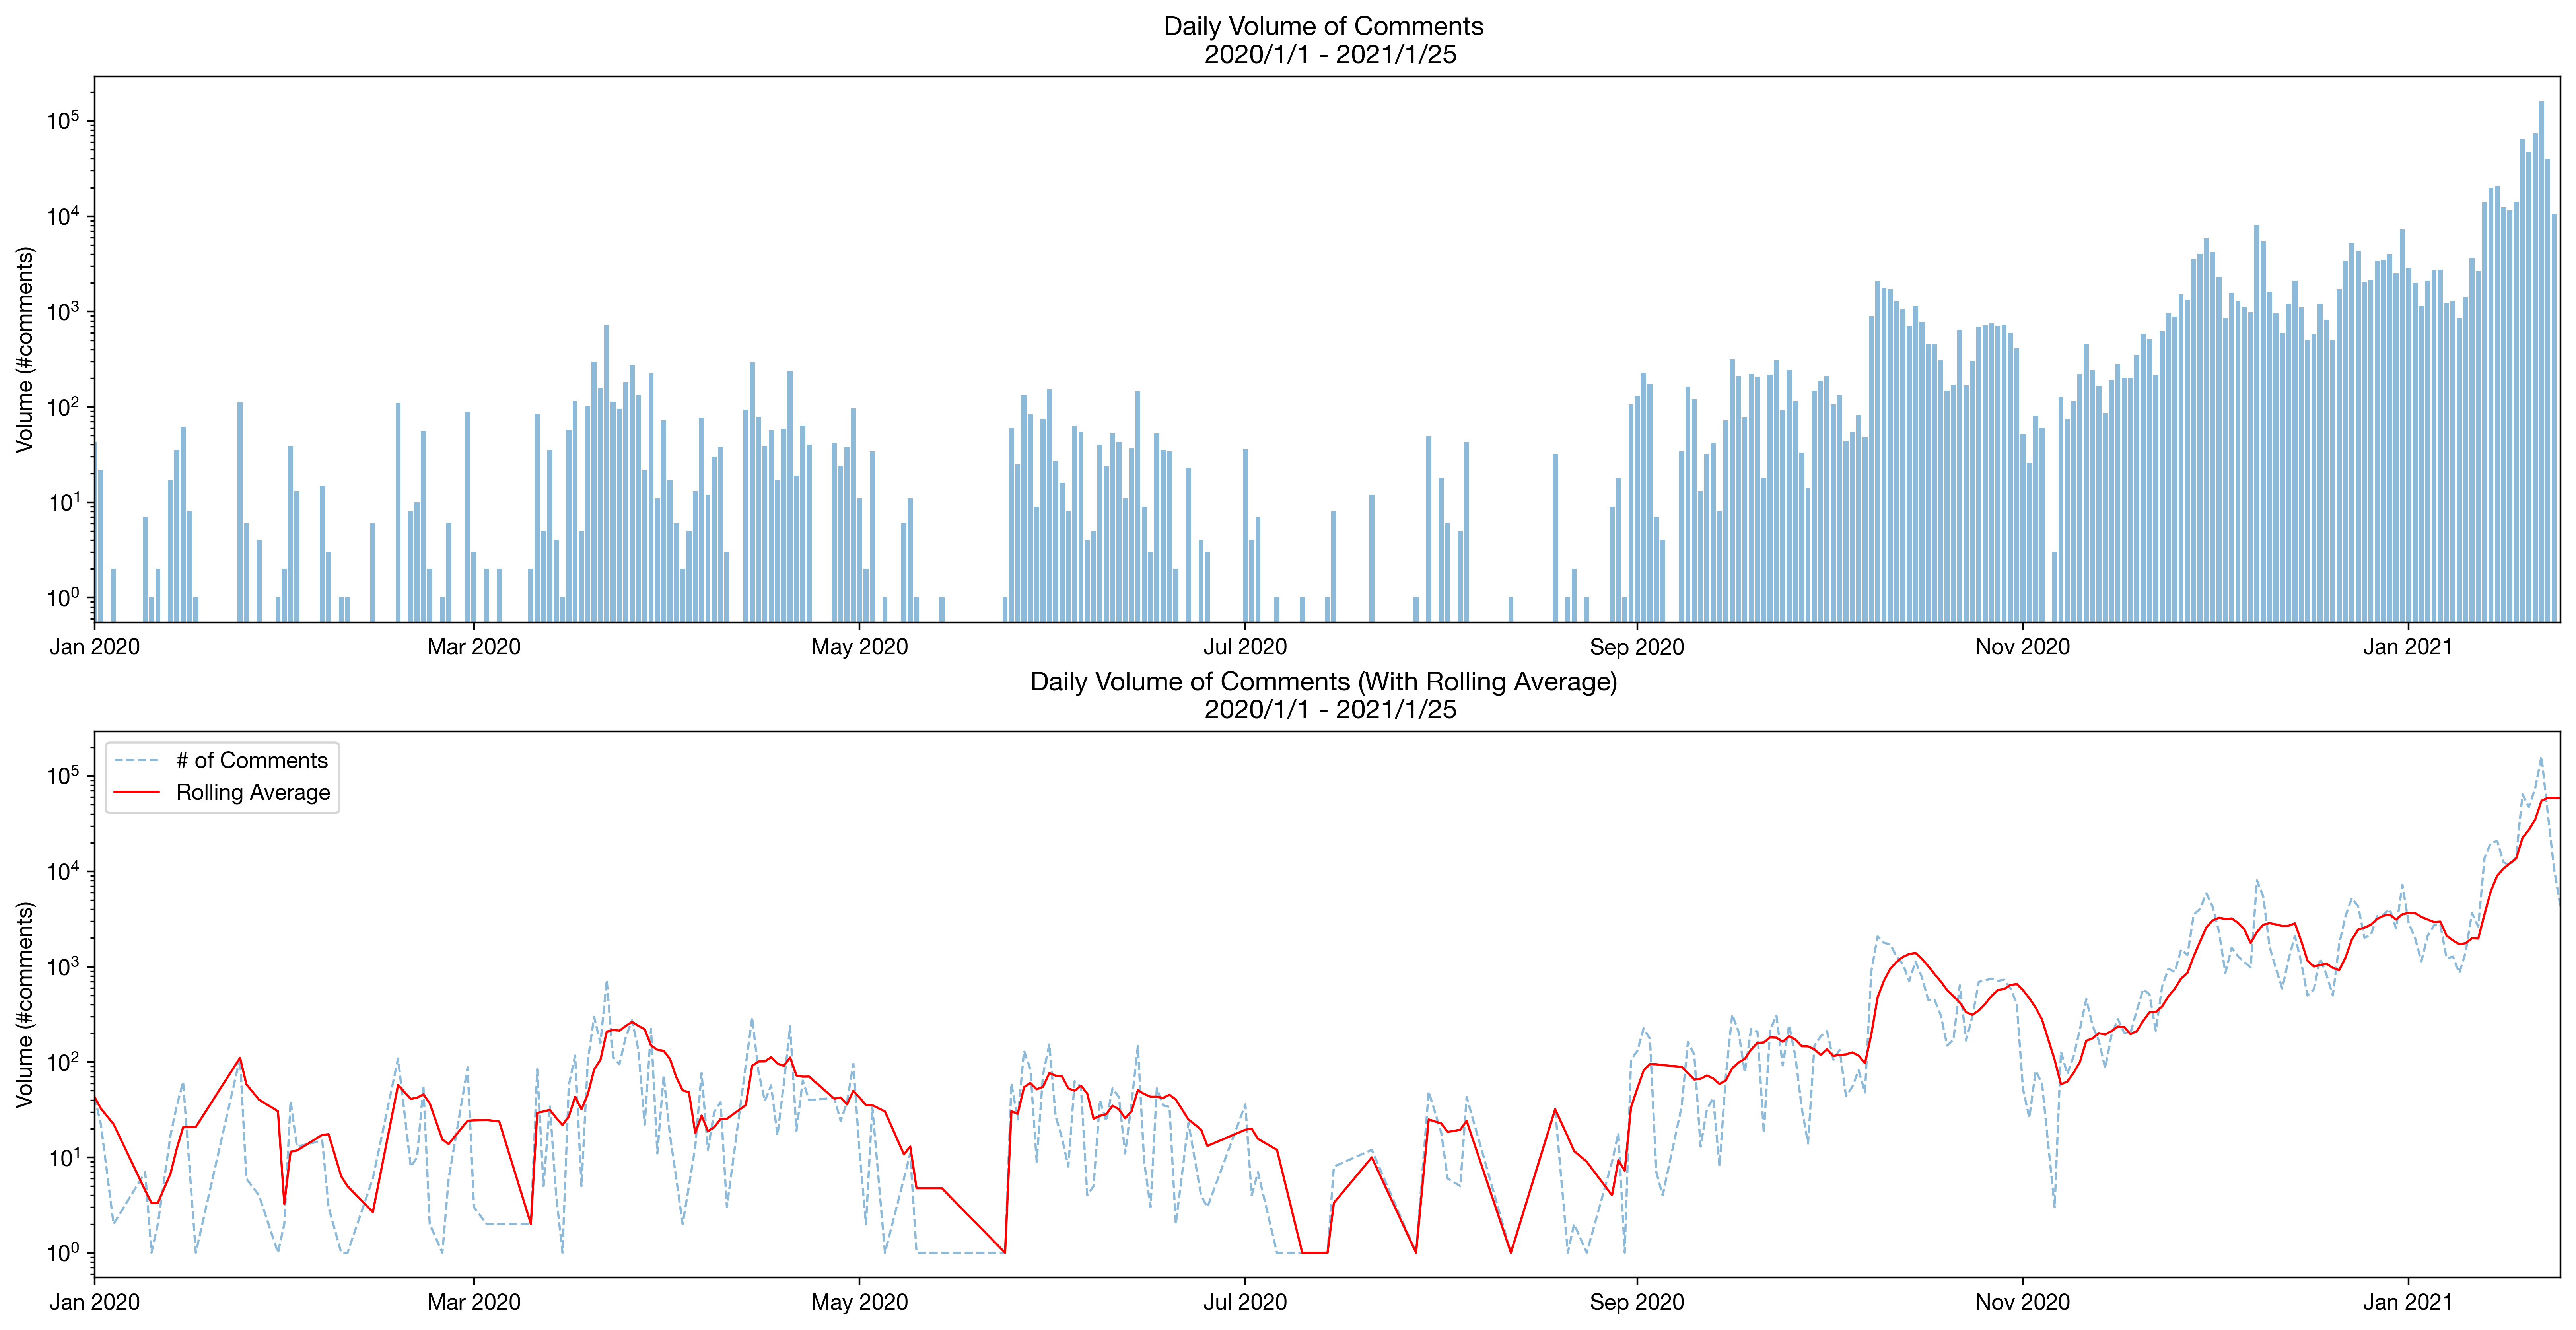

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10), dpi=400)

GME_comments = GME_comments.sort_index()
ax1.bar(GME_comments.index.value_counts(sort=False).index,
       GME_comments.index.value_counts(sort=False).values,
       alpha=0.5)
ax1.set_yscale("log")
ax1.set_ylabel("Volume (#comments)")
ax1.set_title("Daily Volume of Comments \n 2020/1/1 - 2021/1/25")
ax1.set_xlim([dt.date(2020, 1, 1), dt.date(2021, 1, 25)])

counts = GME_comments.index.value_counts(sort=False).sort_index()
rolled_series = counts.rolling('7D').mean()
ax2.plot(counts.index,
       counts.values,
       ls="--",
       alpha=0.5, label='# of Comments')
ax2.plot(rolled_series.index, rolled_series.values, color="r", label='Rolling Average')
ax2.set_yscale("log")
ax2.set_ylabel("Volume (#comments)")
ax2.set_title("Daily Volume of Comments (With Rolling Average) \n 2020/1/1 - 2021/1/25")
ax2.set_xlim([dt.date(2020, 1, 1), dt.date(2021, 1, 25)])
ax2.legend()

ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)

##### What is the advantage of using the log-scale on the y-axis? What is the advantage of using a rolling-window?

The advantages of log-scaling the y-axis are that doing so makes it possible to visualize data with high variance in a single plot like we do in the plots above. A clear disadvantage, however, is that it can put less emphasis on this high variance in the data. In other words, the variance can seem less important if you don't notice the log-scaled axis.

An advantage of the usage of a rolling-window is the it can be beneficial in demonstrating the overall trend and eliminating noise. It does, however, sometimes make crude interpolations and it is important to have an understanding of how and why it does so.

##### Now take a minute to look at these two figures. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?

It definitely becomes evident that the trends of the two plots are equivalent when illustrated on a logarithmic scale. It is important to observe that even while the stock price falls, the comments may rise. This could be due to people discussing whether to sell or not. This can be seen around November 2020.

Generally, the spikes in the stock price seems to correlate with the spikes in the comments discussing the stock.

In [48]:
# Part 2.2
# Compute the daily log-returns and log-change in GME price and comments respectively.
counts = GME_comments.index.value_counts(sort=False).sort_index()
counts = counts.to_frame()
GME_data['log_ret'] = np.log(GME_data.Close) - np.log(GME_data.Close.shift(1))
counts['log-change'] = np.log(counts.values) - np.log(counts.shift(1).values)

In [49]:
#Keep only relevant info, and drop nans. Merge to make sure we get same lengths (and dates)
counts = counts.loc[counts.index <= pd.Timestamp(2021,1,25)]
combined_df = pd.merge(counts, GME_data, left_index=True, right_index=True).dropna()

In [52]:
import scipy.stats
def correlation(x,y):
    return sum((x-np.mean(x))*(y-np.mean(y))) / (np.sqrt(sum((x-np.mean(x))**2)) * np.sqrt(sum((y-np.mean(y))**2)))
r = correlation(np.array(combined_df["log_ret"]), np.array(combined_df["log-change"]))
n = len(combined_df)
dist = scipy.stats.beta(n/2 - 1, n/2 - 1, loc=-1, scale=2)
p = 2*dist.cdf(-abs(r))
print(f"Correlation coefficient: {r}")
print(f"p-value: {p}")

# check with scipy
check = scipy.stats.pearsonr(combined_df["log_ret"], combined_df["log-change"])
print(f"Check: {check}")

Correlation coefficient: 0.30404997384731747
p-value: 1.2657459106853479e-05
Check: (0.3040499738473175, 1.2657459106853658e-05)


The p-value is lower than our level of confidence which is 0.05 ($p << \alpha$). This means that the correlation is statistically significant.

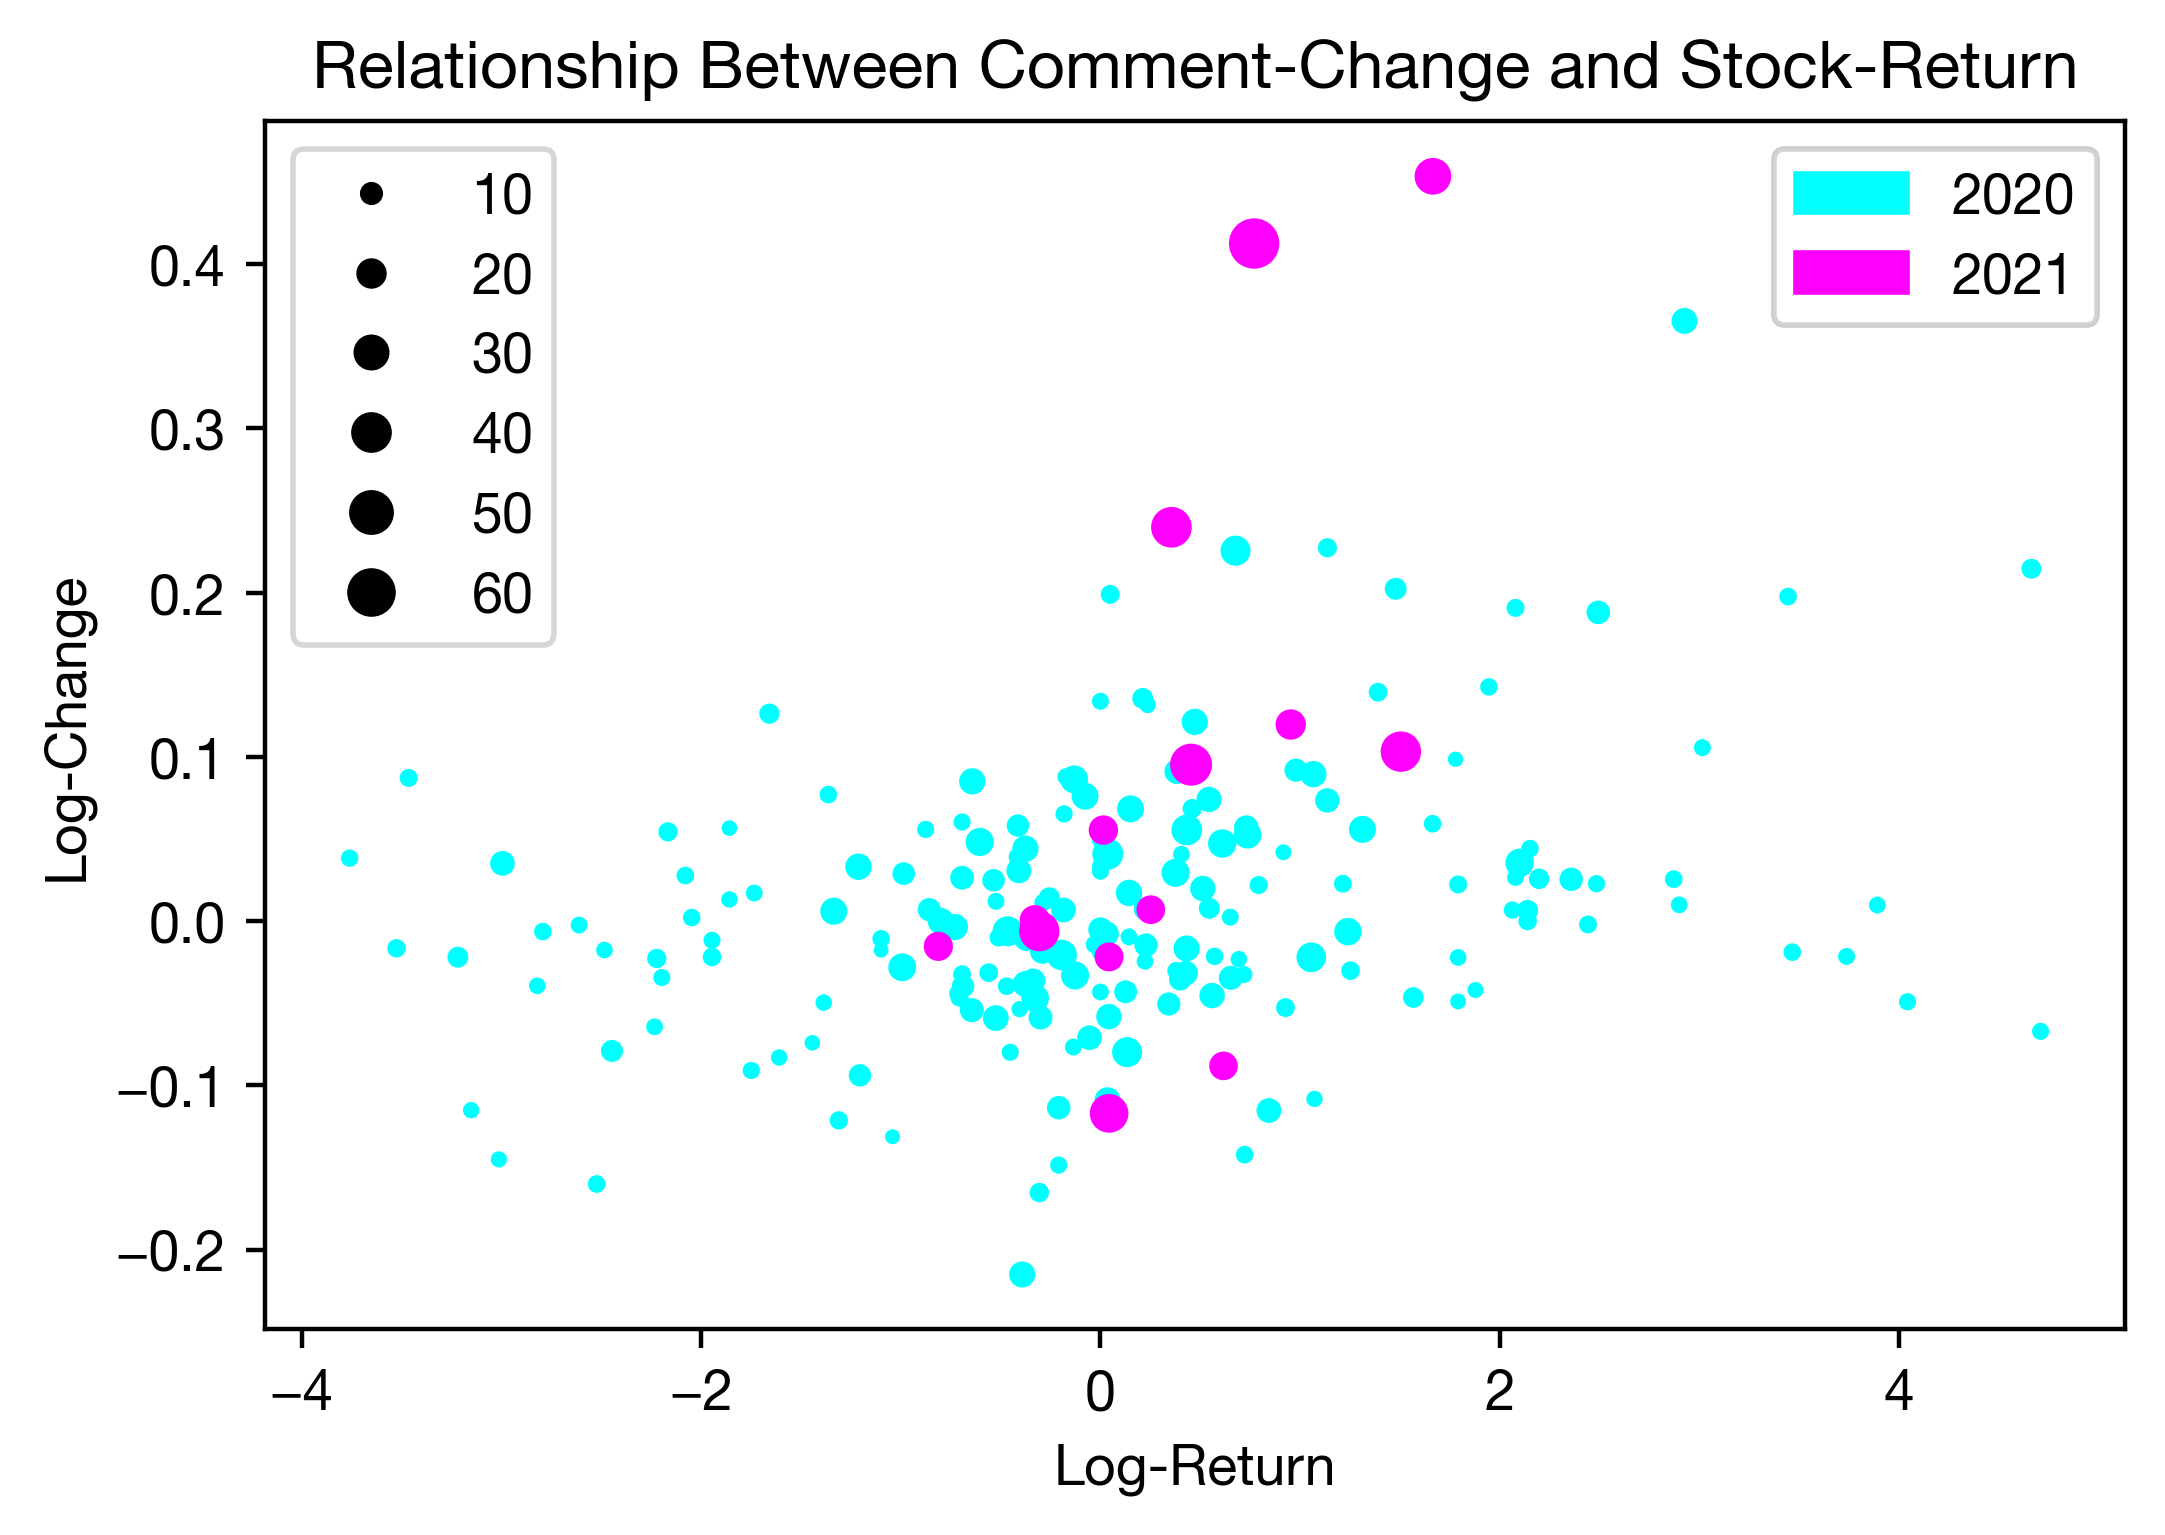

In [154]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(dpi=400)
color_d = {2020:'cyan', 2021:'magenta'}
sc = ax.scatter(combined_df['log-change'],
           combined_df['log_ret'],
           c=combined_df.index.year.map(color_d),
           s=combined_df['Close']
          )
legend1 = ax.legend(*sc.legend_elements("sizes", num=6))
ax.set_ylabel("Log-Change")
ax.set_xlabel("Log-Return")
ax.set_title("Relationship Between Comment-Change and Stock-Return")
cyan_patch = mpatches.Patch(color='cyan', label='2020')
magenta_patch = mpatches.Patch(color='magenta', label='2021')
legend2 = ax.legend(handles=[cyan_patch, magenta_patch])
ax.add_artist(legend1)
ax.add_artist(legend2)
plt.show()

#### *Now take a minute to look at the figure you just prepared. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it?*

We can see on the size that GME stock closes higher in 2021 than in 2020. We can also see that the log-return does not vary as much in 2021 as it does in 2020. Finally, we see that there are a few spikes in log-change in 2021, meaning that there are a few days (3 ish) where the number of comments were a lot larger than the day before in 2021.

Log return looks to be quite varying in 2020, which makes sence as the price varied a lot in that time period too. In 2021 the log-return is generally positive meaning that the price on stock grew!


#### *Based on the exploratory data visualization in Exercises 2 and 3, what can you conclude on the research question: Is the activity on wallstreetbet related to the price of the GME stock?*

The two are positively correlated. And that was computed to be significantly true. Therefore, we will say that; "yes, activity on r/wallstreetbet is related to the GME stock"

#  Part 3: Exercises using the `NetworkX` library


#### Exercise 2.1 from Network science book
Here we make use of Euler's observation, namely that nodes with an odd number of links must be either the starting or ending node. 
By applying this observation we see that only figure $a$ and $d$ have a set of nodes with an odd number of links.


#### Exercise 2.3 from Network science book

Adjacency matrix for the undirected graph:
[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]
Edge-list for the undirected graph:
[(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]


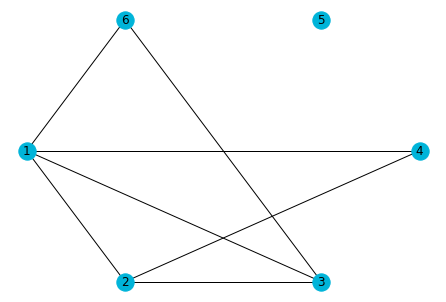

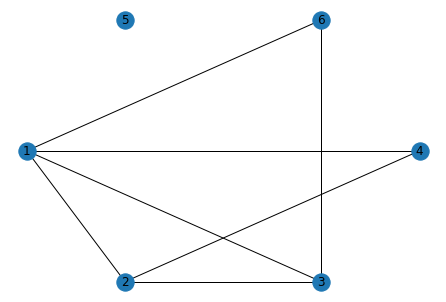

In [79]:
# Exercise 2.3 from Network science book
# Lets start with the adjacency matrix and the link list for the undirected graph.
adjac_matrix = np.array([[0,1,1,1,0,1],[1,0,1,1,0,0],[1,1,0,0,0,1],[1,1,0,0,0,0],[0,0,0,0,0,0],[1,0,1,0,0,0]])
print(f"Adjacency matrix for the undirected graph:")
print(f"{adjac_matrix}")
U = nx.from_numpy_matrix(adjac_matrix, create_using = nx.Graph())
# Now from a link list
# Here we use networkx's parse_adjlist while that takes in a adjcency list as input
lines = ["1 2 3 4", "2 1 3 4", "3 1 2 6", "4 1 2", "5", "6 1 3"]
H = nx.parse_adjlist(lines, nodetype = int)
# The link list can be found by simply looking at the edge pairs.
print(f"Edge-list for the undirected graph:")
print(H.edges())
mapping = {0 : 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
U = nx.relabel_nodes(U, mapping)
nx.draw_shell(U, node_color='#00b4d9', with_labels=True)
plt.show()
nx.draw_shell(H, with_labels = True)
plt.show()

Adjacency matrix for the directed graph:
[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]
Link list for the directed graph:
[(0, 1), (1, 2), (1, 3), (2, 0), (2, 1), (3, 0), (5, 0), (5, 2)]


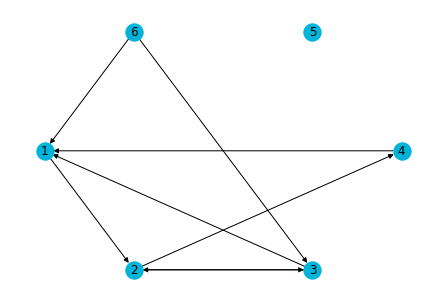

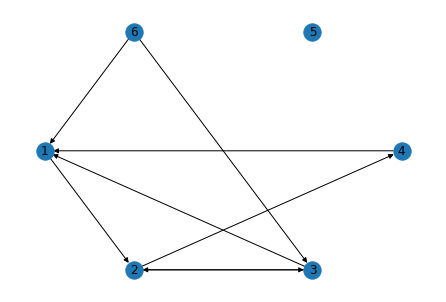

In [80]:
# For the directed case:
# Here we need to create a new adjacency matric for the directed case
adjac_matrix_directed = np.array([[0,1,0,0,0,0],[0,0,1,1,0,0],[1,1,0,0,0,0],[1,0,0,0,0,0],[0,0,0,0,0,0],[1,0,1,0,0,0]])
print(f"Adjacency matrix for the directed graph:")
print(f"{adjac_matrix_directed}")
D = nx.from_numpy_matrix(adjac_matrix_directed, create_using = nx.DiGraph())
# For adjacency list:
lines = ["1 2", "2 3 4", "3 1 2", "4 1", "5", "6 1 3"]
E = nx.parse_adjlist(lines, nodetype = int, create_using = nx.DiGraph())

print(f"Link list for the directed graph:")
print(D.edges())
D = nx.relabel_nodes(D, mapping)
nx.draw_shell(D, node_color='#00b4d9', with_labels=True)
plt.show()
nx.draw_shell(E, with_labels = True)
plt.show()

In [77]:
# Finding the average clustering coefficient for the two graphs
print(f'Clustering coefficient for the first graph (a in the exercise): {round(nx.average_clustering(U),3)}')
print(f'\nClustering coefficient for the second graph (b in the exercise): {round(nx.average_clustering(D),3)}')

Clustering coefficient for the first graph (a in the exercise): 0.639

Clustering coefficient for the second graph (b in the exercise): 0.322


This makes a lot of sense since by directing the network generally the number of neighbors would decrease, resulting in a lower clustering coefficient.
$$C_i = \frac{2*L_i}{k_i*(k_i-1)} $$

#### *If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?*
In the adjacency matrix, row 5 and 6 will switch values and same goes for column 5 and 6.

In the edge-list, we simply replace the numbers 5 and 6.

#### *What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?*

*Well there is a few things which are easier to access when using an adjacency matrix such as its sparsity and how the network is structured e.g. connected components etc.*

Some might say that you cannot store edge weights in an edge-list. What we normally do when working with big graphs, we store an edge-list and a weight-list with indices corresponding to the edges in the edge-list. (You can simply add a column to the edge-list with the weights). The edge-list is not as intuitive as the adjacency matrix but it saves a lot of space as we do not need to store non-edges.

Furthermore, it is problematic as nodes without any links are forgotten in the edge-list. Normally, you simply "forget" the nodes as they might not be that important anyway. But if you want those nodes, you are gonna have to create a new node that should be a "non-node" which you can connect the node to. That way you might be able to keep the nodes in the list but you should keep track of the "non-nodes" so that you don't create a fictional node in your graph.

#### *In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?*

With the repetition of nodes and links we found 5 different paths through the undirected graph with a length of 3:
> * 1->2->1->3
> * 1->3->1->3
> * 1->4->1->3
> * 1->4->2->3
> * 1->6->1->3

There is no path of length 3 through the directed graph.

In [128]:
for source in U.nodes():
    if source == 1:
        paths = []
        true_target = 3
        #Get paths with no backtrack
        path2 = [l for l in list(nx.all_simple_paths(U, source=source, target=true_target)) if len(l) == 4]
        paths.append(path2)
        for target in U.neighbors(source):
            if [l for l in list(nx.all_simple_paths(U, source=source, target=true_target)) if len(l) < 3]:
                #We know that we can backtrack once and go forward again
                path = [source, target, source, true_target]
                paths.append(path)
            
        

for i,x in enumerate(paths):
    if x == []:
        print('No paths of length 3')
    else:
        print(f'Path # {i+1}: {x}')

Path # 1: [[1, 4, 2, 3]]
Path # 2: [1, 2, 1, 3]
Path # 3: [1, 3, 1, 3]
Path # 4: [1, 4, 1, 3]
Path # 5: [1, 6, 1, 3]


In [129]:
for source in D.nodes():
    if source == 1:
        paths = []
        true_target = 3
        #Get paths with no backtrack
        path2 = [l for l in list(nx.all_simple_paths(D, source=source, target=true_target)) if len(l) == 4]
        paths.append(path2)
        for target in D.neighbors(source):
            if [l for l in list(nx.all_simple_paths(D, source=source, target=true_target)) if len(l) < 3]:
                #We know that we can backtrack once and go forward again
                path = [source, target, source, true_target]
                paths.append(path)
            
for i,x in enumerate(paths):
    if x == []:
        print('No paths of length 3')
    else:
        print(f'Path # {i+1}: {x}')

No paths of length 3


#### Exercise 2.3 from Network science book

#### Construct its adjacency matrix. Why is it a block-diagonal matrix?

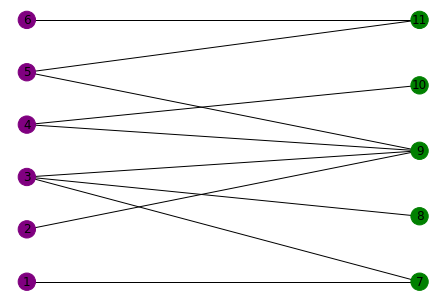

In [137]:
# Exercise 2.5 from Network science book
# First lets construct the bipartite network
from networkx.algorithms import bipartite
B = nx.Graph()
B.add_nodes_from([1,2,3,4,5,6], bipartite = 0)
B.add_nodes_from([7,8,9,10,11], bipartite = 1)
B.add_edges_from([(1,7),(7,3),(2,9),(3,8),(3,9),(4,9),(4,10),(5,9),(5,11),(6,11)])

color_map = []
for node in B:
    if node < 7:
        color_map.append('purple')
    else: 
        color_map.append('green') 

top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(B) - top_nodes
G = bipartite.projected_graph(B, top_nodes)

nx.draw(B, with_labels = True, pos = nx.bipartite_layout(B, top_nodes), node_color = color_map) # , pos = nx.drawing.layout.bipartite_layout(B)
plt.show()


In [133]:
#Construct its adjacency matrix.
nx.adjacency_matrix(B).todense()

matrix([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]])

<AxesSubplot:>

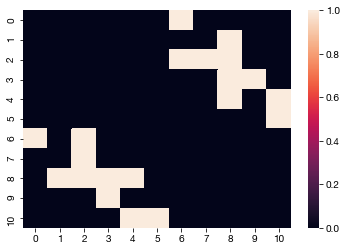

In [134]:
#Making the block structure more visible
import seaborn as sns
sns.heatmap(nx.adjacency_matrix(B).todense())

The reason why the bipartite network's adjacency matrix has a block structure is because of the fact that the structure of the network has two disjoint partions U and V, meaning that in the adjacency matrix there will be no internal links within U and V.

#### Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.


In [135]:
# Construct the projected graphs
purp_proj = bipartite.projected_graph(B, range(1,7))
green_proj = bipartite.projected_graph(B, range(7,12))
nx.adjacency_matrix(purp_proj).todense(), nx.adjacency_matrix(green_proj).todense()

(matrix([[0, 0, 1, 0, 0, 0],
         [0, 0, 1, 1, 1, 0],
         [1, 1, 0, 1, 1, 0],
         [0, 1, 1, 0, 1, 0],
         [0, 1, 1, 1, 0, 1],
         [0, 0, 0, 0, 1, 0]]),
 matrix([[0, 1, 1, 0, 0],
         [1, 0, 1, 0, 0],
         [1, 1, 0, 1, 1],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0]]))

#### Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.

In [147]:
deg_bi_purp = list(B.degree())[:6]
deg_bi_green = list(B.degree())[6:]
print(f'Average degree of purple nodes: {round(np.sum([i[1] for i in deg_bi_purp]) / len(deg_bi_purp),2)}')
print(f'Average degree of purple nodes: {np.sum([i[1] for i in deg_bi_green]) / len(deg_bi_green)}')


purp_degree = list(purp_proj.degree())
#Calculating average degree
print(f'\nAverage degree of projected puple nodes: {sum(x[1] for x in purp_degree)/len(purp_degree):.2f}')
green_degree = list(green_proj.degree())
#Calculating average degree
print(f'Average degree of projected green nodes: {sum(x[1] for x in green_degree)/len(green_degree)}')

Average degree of purple nodes: 1.67
Average degree of purple nodes: 2.0

Average degree of projected puple nodes: 2.67
Average degree of projected green nodes: 2.0


#### Is it surprising that the values are different from those obtained in point (c)?
Well it makes intuitive sense that the average degree of the purple nodes increases given that there are more purple nodes than green, hence, when we make the projection the degree of purple nodes will increase given that they share more common green nodes. 

The opposite is true for the green nodes, however, the links are constructed in a way that links are given and thrown away at the same rate (thrown away when only one green node links to the purple node) resulting in no change in average degree.

# Part 4: Properties of the real-world network of Redditors

Determining the value p such that the number of expected edges equals the number in the redditor network using (3.2): $$<L>=p * \frac{N(N-1)}{2}$$
We are then isolating p: $$ p = \frac{2<L>}{N(N-1)}$$

In [162]:
G = nx.readwrite.gml.read_gml("reddit_community_graph.gml")

RG = G.to_undirected(reciprocal=True)
#weights in undirected should corrspond of sum of directed
for a, b, weight in RG.edges.data("weight"):
    RG[a][b]["weight"] = G[a][b]["weight"] + G[b][a]["weight"]
#Removing self loops
RG.remove_edges_from(nx.selfloop_edges(RG))
#Removing isolated nodes
RG.remove_nodes_from(list(nx.isolates(RG)))

In [163]:
L = len(RG.edges)
N = len(RG.nodes)
p = 2*L/(N*(N-1))
print(f'p = {p * 100:.2f}%')

p = 0.03%


Compute the average value of the degree with (3.3): $$<k> = \frac{2L}{N} = p(N-1)$$

In [167]:
k = p*(N-1)
print(f"k = {round(k,2)}")

k = 3.16


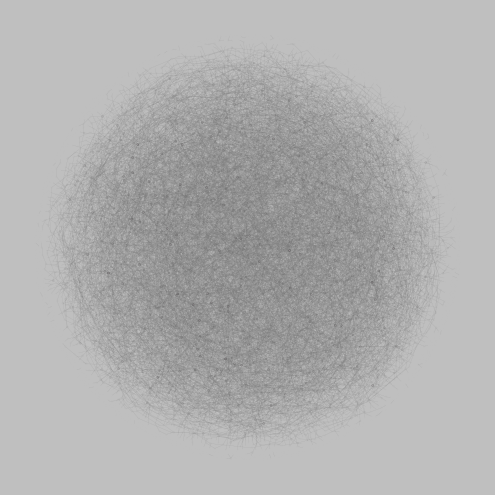

In [174]:
%matplotlib inline
#Create random graph
Random_graph = nx.generators.random_graphs.erdos_renyi_graph(N,p)
with plt.style.context('classic'):
    network, config = netwulf.interactive.visualize(Random_graph, plot_in_cell_below=False)
    fig, ax = netwulf.draw_netwulf(network)

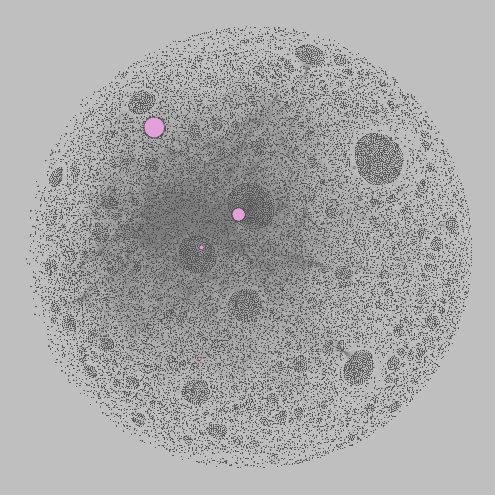

In [175]:
#Plot real graph
with plt.style.context('classic'):
    network, config = netwulf.interactive.visualize(G, plot_in_cell_below=False)
    fig, ax = netwulf.draw_netwulf(network)

We can see that the random network does not possess the local clustering characteristic which is common for real world social networks and also present in our real world network. 



#### *Part 4.2 Clustering: Compare the clustering coefficient in the Redditors Network and its random counterpart.*

Clustering coefficient:
$$C_{i}=\frac{2L_i}{k_{i}(k_{i}-1)}$$

In [230]:
C = []
for node in Random_graph.nodes():
    neighbors = Random_graph.neighbors(node)
    subgraph_neighbors = Random_graph.subgraph(neighbors)
    L_i = len(subgraph_neighbors.edges)
    C.append((2*L_i) / (Random_graph.degree(node) * (Random_graph.degree(node) - 1)+1e-6)) #Few nodes only have k_i = 1 or k_i = 0

In [231]:
lst = list(nx.clustering(Random_graph).values())
lst = [float(i) for i in lst]
degrees = [x[1] for x in Random_graph.degree]

In [232]:
print(f'C_avg_book = {np.mean(C)} | p_book = {round(p,10)}')
print(f'\nC_avg_nx = {np.mean(lst)} | p_nx = {round(np.mean(degrees) / len(degrees),10)}')

C_avg_book = 0.00037346925272690876 | p_book = 0.0003021677

C_avg_nx = 0.0003734693226510625 | p_nx = 0.0002999956


Yes it is consistent with 3.21. The average clustering coefficient is a little bit larger than p, but it may be due to the seed used when producing the random graph.

In [217]:
C = []
for node in RG.nodes():
    neighbors = RG.neighbors(node)
    subgraph_neighbors = RG.subgraph(neighbors).copy()
    L_i = len(subgraph_neighbors.edges)
    k_i = RG.degree(node)
    C.append((2*L_i) / (k_i * (k_i - 1) + 1e-6)) #Few nodes only have k_i = 1 or k_i = 0

In [218]:
lst = list(nx.clustering(RG).values())
lst = [float(i) for i in lst]
degrees = [x[1] for x in RG.degree]

In [219]:
print(f'C_avg_book = {np.mean(C)} | p_book = {round(p,10)}')
print(f'\nC_avg_nx = {np.mean(lst)} | p_nx = {round(np.mean(degrees) / len(degrees),10)}')

C_avg_book = 0.018800117003840412 | p_book = 0.0003021677

C_avg_nx = 0.018800122700850207 | p_nx = 0.0003021388


In [229]:
print(f'Minimum degree: {min(degrees)} \nMaximum degree: {max(degrees)}')

Minimum degree: 1 
Maximum degree: 498


We can see that the average clustering coefficient of the real reddit graph seems to be a lot bigger than in the random graph. This supports the idea that there is more clustering in the real graph than in the random graph. The max and min degree also supports the idea that the real network is heavy tailed.